어제 날짜의 네이버 영화 조회순 순위 1~10위 영화들을 기준으로 (어제 날짜가 최신임)
영화들의 날짜별 순위 변동폭 그래프 

In [1]:
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#한글 폰트 설정
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

In [3]:
rank1to10 = []
dateList = []
rankingPoint = []
for i in range(10):
    rankingPoint.append([])
    for j in range(10):
        rankingPoint[i].append(0)
for i in range(1,11):
    date = time.localtime(time.time() - i*60*60*24)
    date = time.strftime('%Y%m%d', date)
    dateList.append(date)
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cnt&tg=0&date=' + date
    raw = BeautifulSoup(urlopen(url), "html.parser")
    rawRanking = list(raw.find_all("div", "tit3"))
    
    if i == 1: #영화를 어제의 10위까지의 영화로 기준을 잡기 위해
        for j in range(10):
            rank1to10.append(str(rawRanking[j]).split('"')[5])
            
    ranking = []
    for j in range(50):
        ranking.append(str(rawRanking[j]).split('"')[5])

    for movie in rank1to10:
        if movie not in ranking:
            rankingPoint[rank1to10.index(movie)][i-1] = None
        else:
            rankingPoint[rank1to10.index(movie)][i-1] = ranking.index(movie) + 1

In [4]:
dateList.reverse()
for i in range(10):
    rankingPoint[i].reverse()

colorList = []
for i in range(10):
    while True:
        color = '#'+hex(np.random.randint(16**6))[2:]
        if color not in colorList:
            colorList.append(color)
            break

(10.5, 0.5)

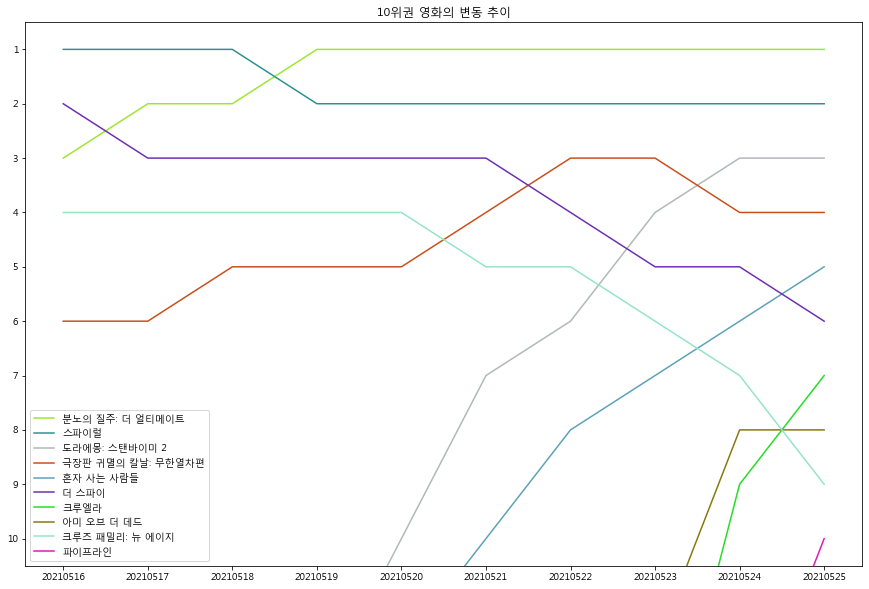

In [14]:
plt.figure(figsize=(15,10))
for movie in rank1to10:
    movieIndex = rank1to10.index(movie)
    plt.plot(dateList, rankingPoint[movieIndex], color=colorList[movieIndex])

plt.legend(rank1to10, loc='best')
plt.title('10위권 영화의 변동 추이')
plt.yticks(range(1,11))
plt.ylim(10.5,0.5)